# Instituto Tecnológico y de Estudios Superiores de Monterrey
Maestría en Inteligencia Artificial Aplicada
Ciencia y analítica de datos 
TC4029.10

# Semana 6 Data Analysis con Python 
Modulo3
Exploratory Data Analysis

Alumna:
**Adriana Fernanda Jiménez Avalos A01087695**

Profesores:	
Profesor titular: Jobish Vallikavungal
Profesor asistente: Juan Miguel Meza Méndez  

Maestría Virtual, 25 Oct 2022

In [50]:
import pandas as pd #librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
import scipy.stats

from seaborn.distributions import stats
from os import stat

1.Exploratory Data Analysis

EDA permite hacer resumen de las caracteristicas de los datos para poder comprenderlos mejor en un set de datos. Tambien se puede identificar las relaciones entre variables y extraer los datos mas importantes.

2. Descriptive Statistics

Esto ayuda a describir las caracteristicas principales de los datos.


In [10]:
#df.describe() #da idea de la distribucion de las diferentes variables
#value_counts() este metodo hacer resumen de los datos categoricos
#bucky_badgers= df["bucky badgers"].value_counts()


En las cajas de bigotes se muestra la mediana. El cuartil superior (75 porcentil). Cuartil inferior (25 porcentil).
La informacion entre el cuartil superior e inferior es el intercuartil.
Los extremos mayores o menores son calculados con 1.5 veces el intercuartil.

Los bigotes de la caja representan los extremos mayores o menores estos son los outliers.

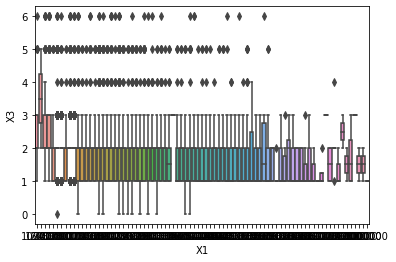

In [24]:
df= pd.read_csv('/content/sample_data/default of credit card clients.csv') 
df

cdf=df.copy() #para no modificar original
cdf

#box plots o caja de bigotes es una manera visual de ver la descripcion estadistica de la informacion.
sns.boxplot(x="X1", y="X3", data=cdf)

En ocasiones se quiere conocer la estadistica de variables continuas.
Scatter plot muestra la relacion entre dos variables
1.predictor/ variables independientes en el eje x
2. target/ variables dependientes en el eje y

Text(0.5, 0, 'x3')

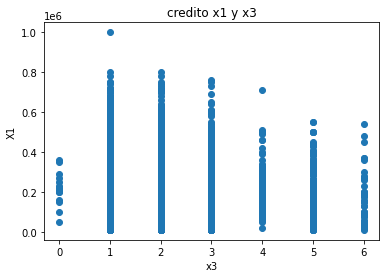

In [21]:
#variables continuas

y= cdf["X1"]
x= cdf["X3"]
plt.scatter (x,y)

plt.title ("credito x1 y x3")
plt.ylabel ("X1")
plt.xlabel ("x3")

3. GroupBy in Python

Como transformar los datos por medio de agrupacion.

Esto se utiliza cuando se quiere saber la relacion entre los diferentes tipos de datos.

Este metodo de agrupado de panda dataframe.groupby() puede aplicarse a variables categoricas, agrupar datos en categorias, variables solas o multiples


In [26]:
df_test= cdf[['X3', 'X4', 'X5']]
df_grp= df_test.groupby(['X3','X4'], as_index=False).mean()
df_grp

,X3,X4,X5
0,0.0,1.0,39.250000
1,0.0,2.0,38.700000
2,1.0,0.0,36.500000
3,1.0,1.0,40.481860
4,1.0,2.0,30.755141
5,1.0,3.0,41.980000
6,2.0,0.0,36.166667
7,2.0,1.0,38.499123
8,2.0,2.0,30.899288
9,2.0,3.0,40.801242


Con la informacion de agrupacion no es muy sencilla de visualizar, es por eso que se utiliza el metodo pivot en pandas.

Donde una variable se puede visualizar en columnas y otra variables en renglones


In [28]:
df_pivot= df_grp.pivot (index='X3', columns= 'X4')
df_pivot

X5                                 
X4         0.0        1.0        2.0        3.0
X3                                             
0.0        NaN  39.250000  38.700000        NaN
1.0  36.500000  40.481860  30.755141  41.980000
2.0  36.166667  38.499123  30.899288  40.801242
3.0  38.159091  43.081147  35.837087  46.640777
4.0        NaN  39.269231  29.617647  36.000000
5.0        NaN  38.246667  32.377953  39.666667
6.0        NaN  46.500000  40.619048  42.000000

Otra manera de visualizar los datos del pivot es en un mapa de calor

En el mapa de calor se grafica la variable sobre multiples variables, este asigna diferente intensidad de colores dependiendo de los valores en el punto de cuadricula. Es una buena manera para graficar los valores sobre multiples valores.

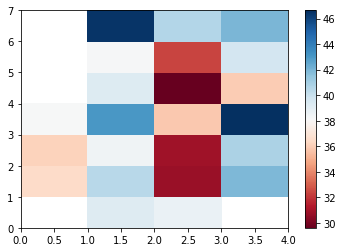

In [29]:
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

4. Analysis of Variance ANOVA

ANOVA nos sirve para comparacion estadistica de grupos.
En el ejemplo de el modulo habla sobre promedio de costo de carro.

ANOVA sirve para encontrar la correlacion entre diferentes frupo de una variable categorica

Se obtienen dos valores> Ftest score y P value

Ftest score: variacion entre medias del grupo dividida por la variacion del mismo grupo
P-Value: es el grado de confidencia

In [43]:
df_anova=cdf[['X4','X5']]
grouped_anova =df_anova.groupby(['X4'])

#anova_results= stats.f_oneway(grouped_anova.get_group('X7')('X8'), grouped_anova.get_group('X9')('X10'))

5. Correlation

Mide hasta que punto diferentes variables son interdependientes.

Esto no se debe confundir con causa y efecto

Este se puede saber con el metodo Correlation- Positive linear relationship

(0.0, 8.502596330477555)

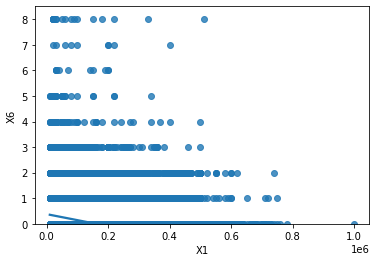

In [45]:
#correlacion entre dos caracteristicas
sns.regplot(x="X1", y="X6", data=cdf)
plt.ylim(0,)

6. Correlation- Statistics

**metodo Pearson correlation** 
Da dos valores de correlacion entre dos variables

-coeficiente de correlacion

-p-value


Para el coeficiente de **correlacion**

-cerca de +1: relacion larga positiva

-cerca de -1: relacion larga negativa

-cerca de 0: no tiene relacion

Para el **valor P**

-cuando es <0.001 es fuerte!

-cuando es <0.05 moderado

-cuando es<0.1 debil

-cuando es >0.1 no hay seguridad


Se dice que hay una fuerte correlacion cuando el coeficiente se acerca a -1o+1 y el Pvalue es menor a 0.001


In [56]:
ncdf=cdf.rename(columns={'X1':'MontCred','X2':'Gen','X3':'Edu','X4':'StaMar','X5':'Edad','X6':'MPSep','X7':'MPAg','X8':'MPJul','X9':'MPJun','X10':'MPMay','X11':'MPAbr', 'X12':'BSSep', 'X13':'BSAg', 'X14':'BSJul','X15':'BSJun','X16':'BSMay','X17':'BSAbr','X18':'PPSep','X19':'PPAg','X20':'PPJul','X21':'PPJun','X22':'PPMay','X23':'PPAbr'})
ncdf.dropna(axis='index', how='all', subset=['Edu','Edad'], inplace= True) #eliminara solo cuando la hilera entera no tenga valores en edu y edad. Es importante agrega inplace para que salve el cambie
ncdf

ncdf.fillna(0, inplace=True) #todos los lados de NA que sean 0, para futuros calculos

ncdf2 = ncdf.drop(['Gen','StaMar'], axis = 1)





In [57]:
ncdf2

,ID,MontCred,Edu,Edad,MPSep,MPAg,MPJul,MPJun,MPMay,MPAbr,...,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr,Y
0,1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,3.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,3.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,3.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


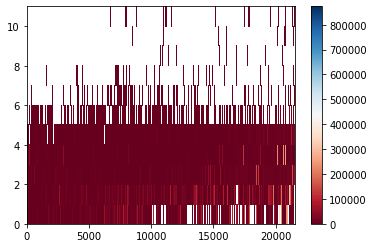

In [61]:
df_test2= ncdf2[['MPSep', 'BSJun', 'PPSep']]
df_grp2= df_test2.groupby(['MPSep','BSJun'], as_index=False).mean()
df_grp2

df_pivot2= df_grp2.pivot (index='MPSep', columns= 'BSJun')
df_pivot2

plt.pcolor(df_pivot2,cmap='RdBu')
plt.colorbar()
plt.show()

In [66]:
pearson_coef, p_value= stats.pearsonr (ncdf2['MPJul'], ncdf2['BSJul'])
df_pivot3=pearson_coef, p_value

df_pivot3
#plt.pcolor(df_pivot3, cmap='RdBu')
#plt.colorbar()
#plt.show()

(0.22758968748219682, 0.0)

# **QUIZ**

Quiz

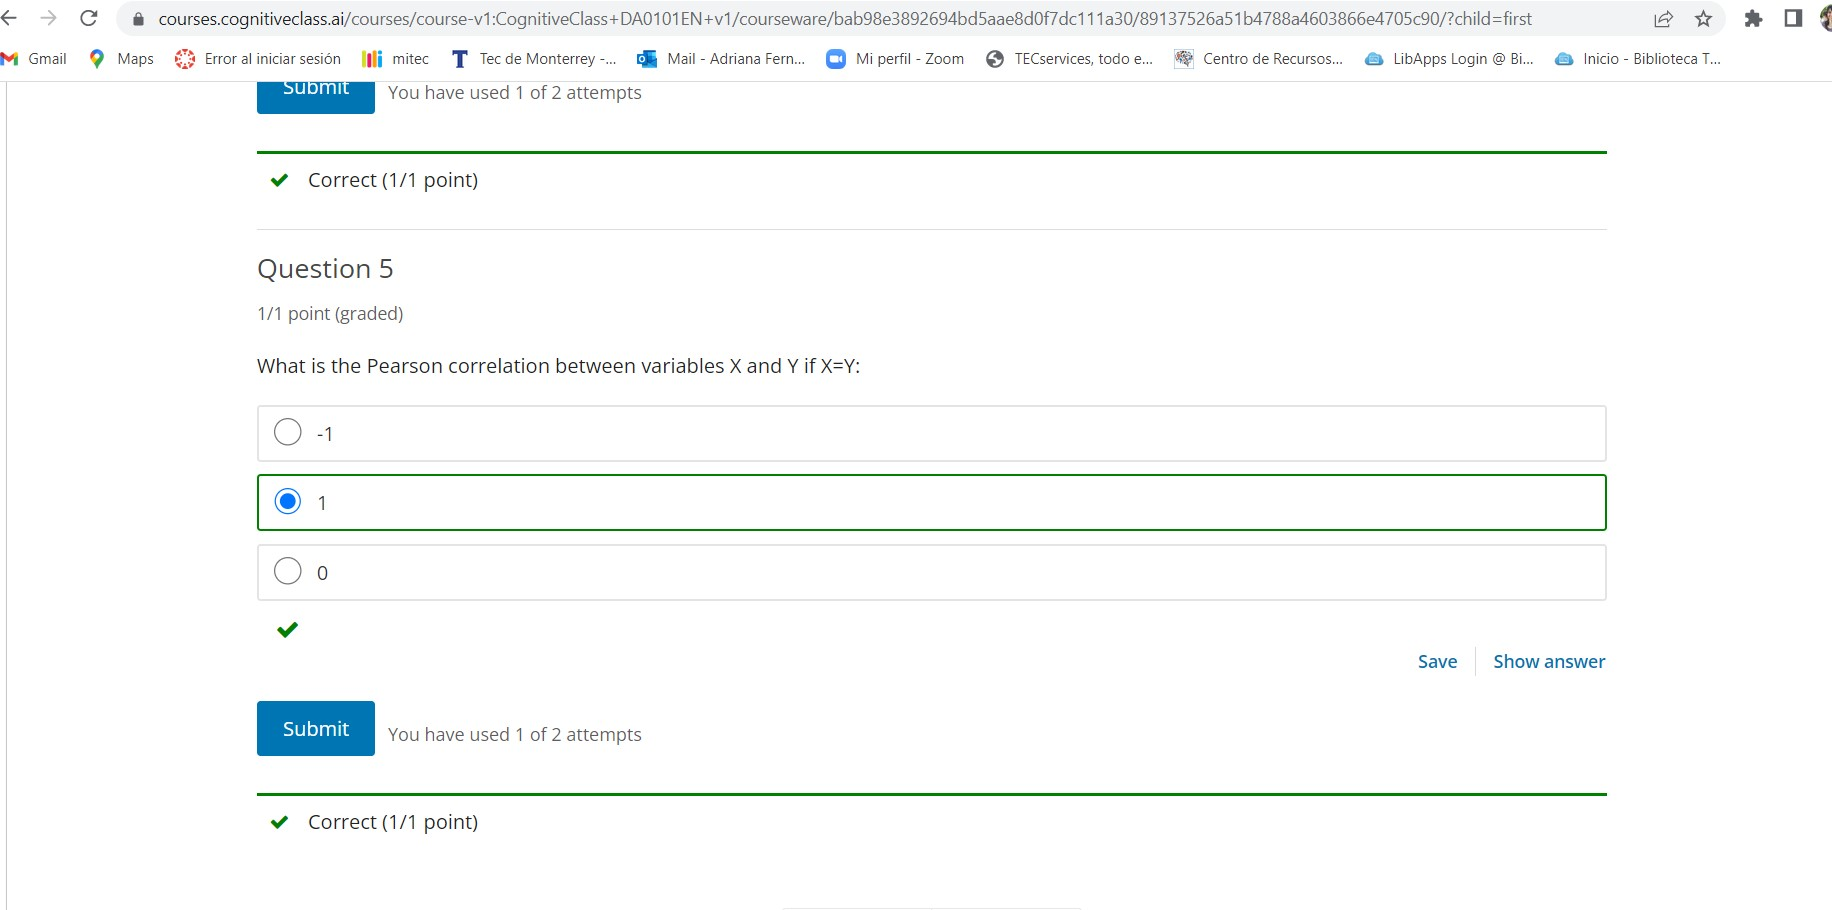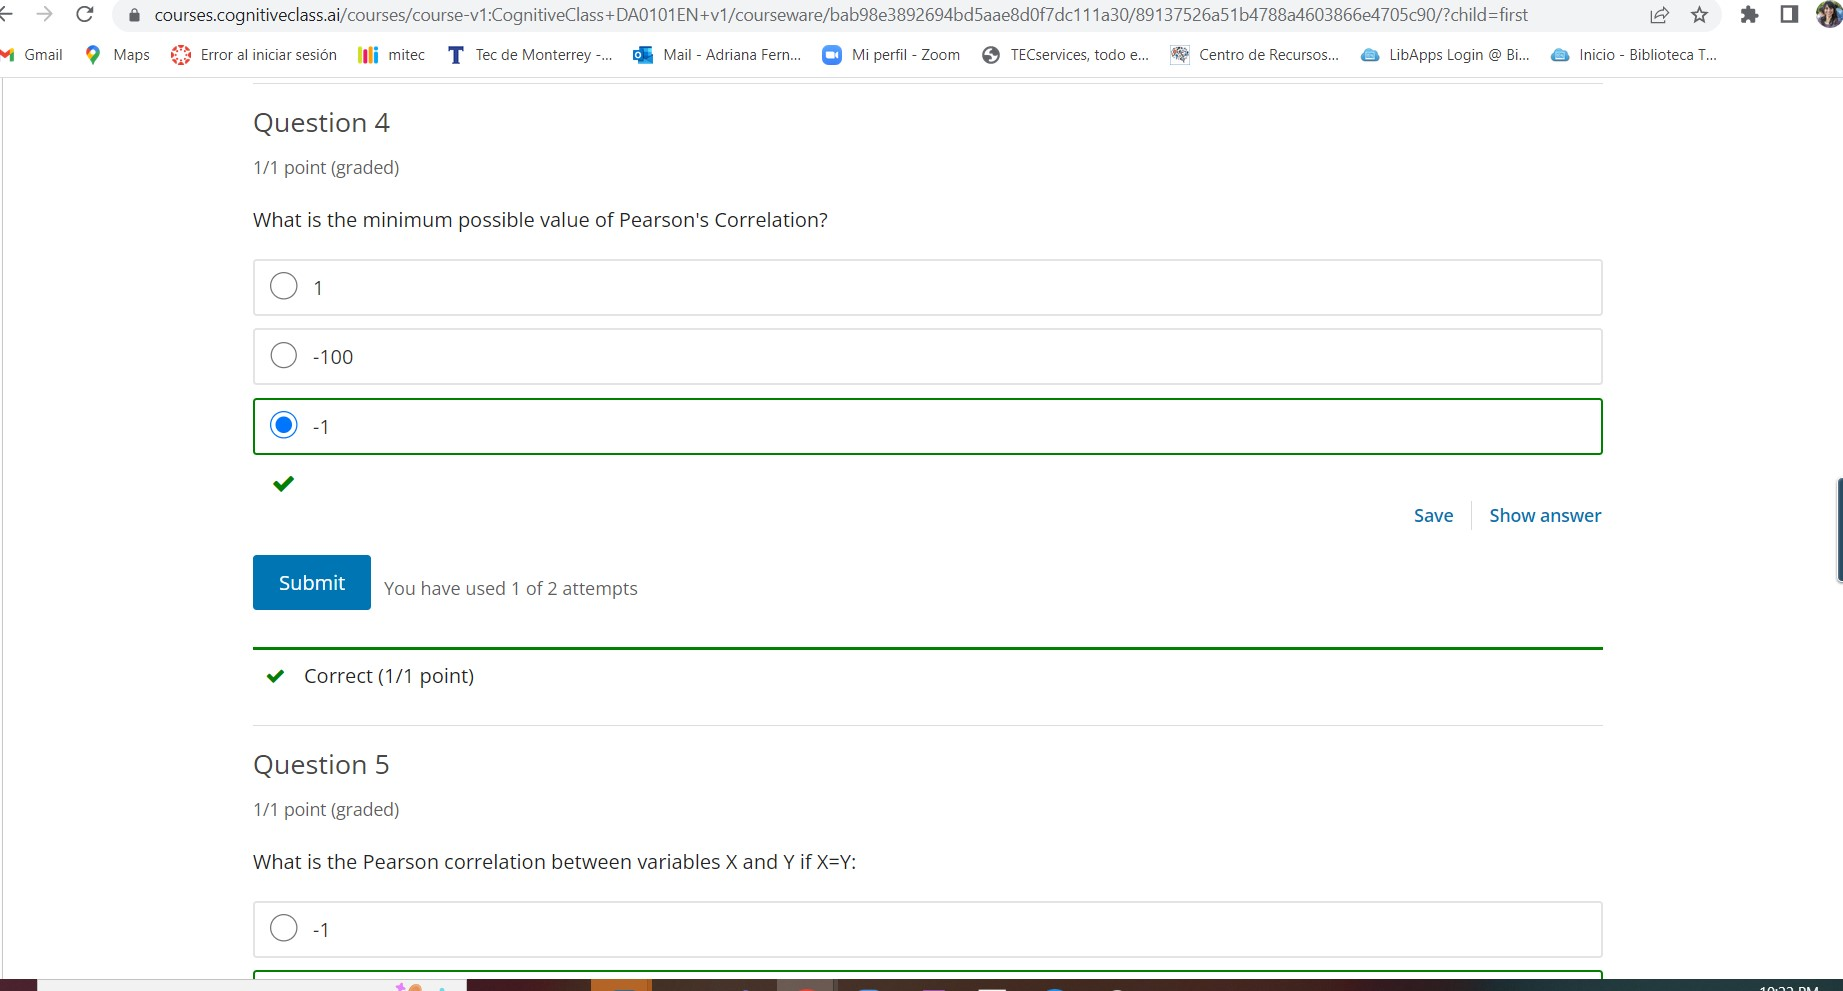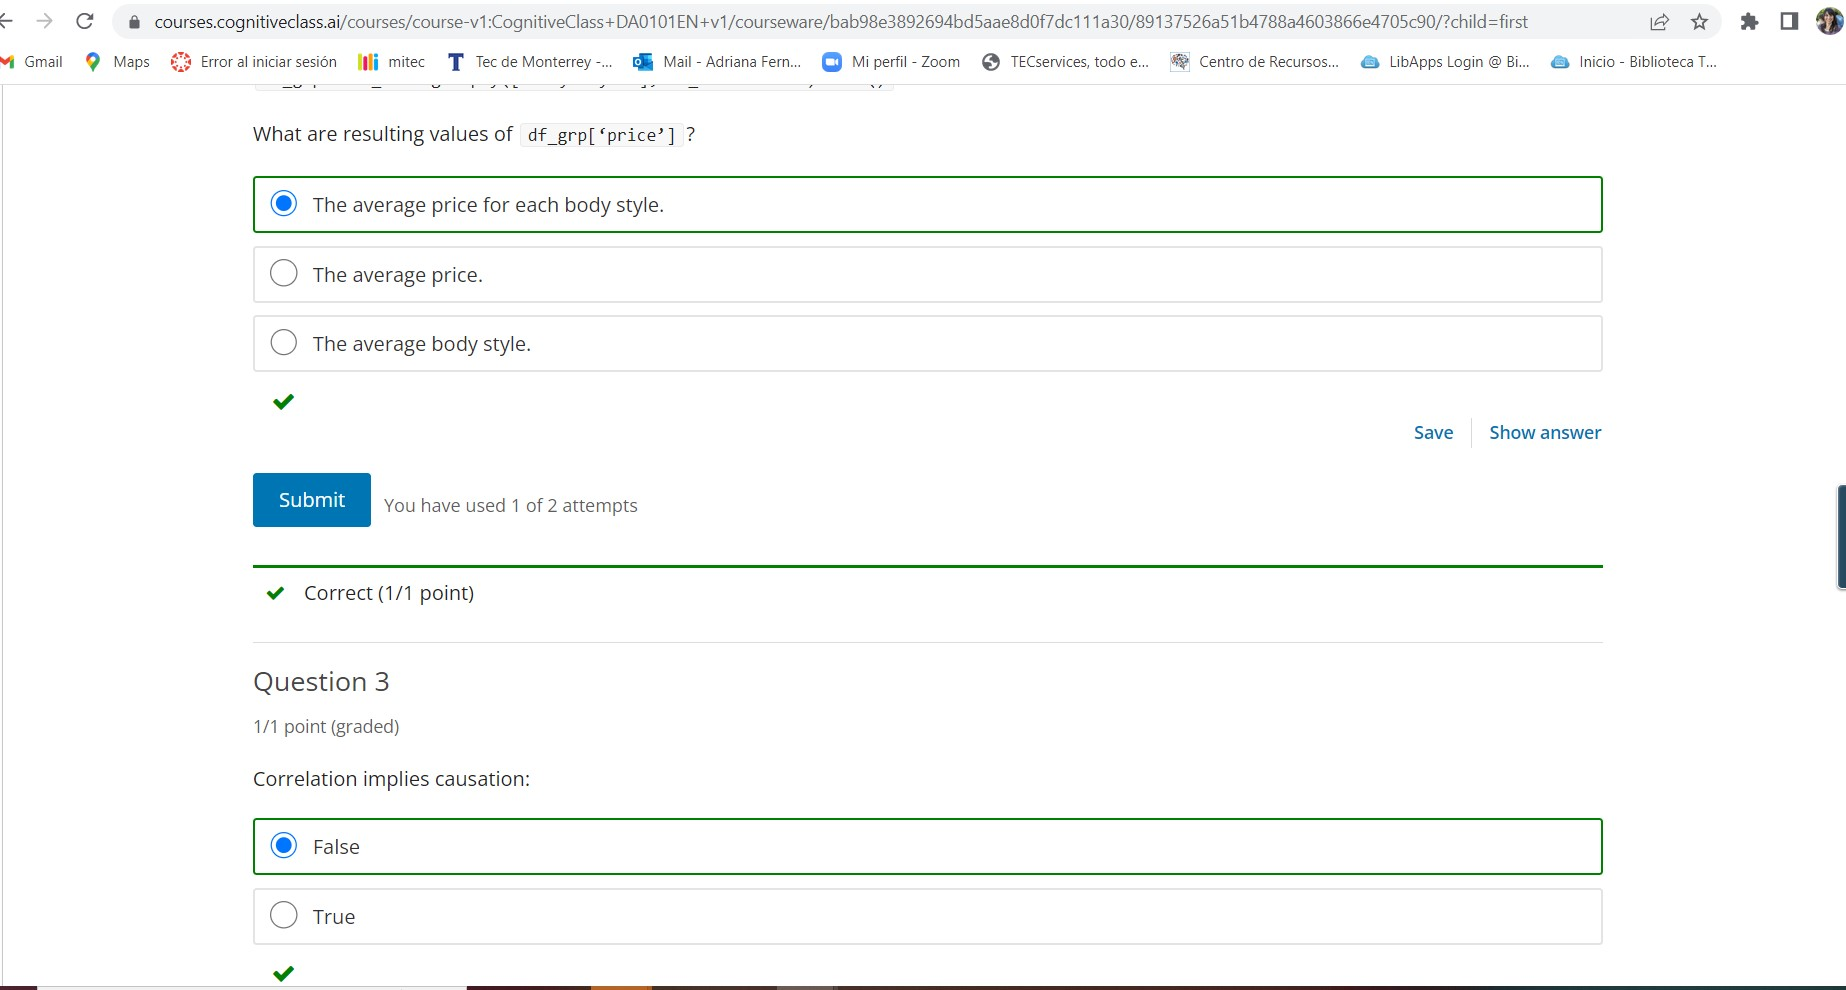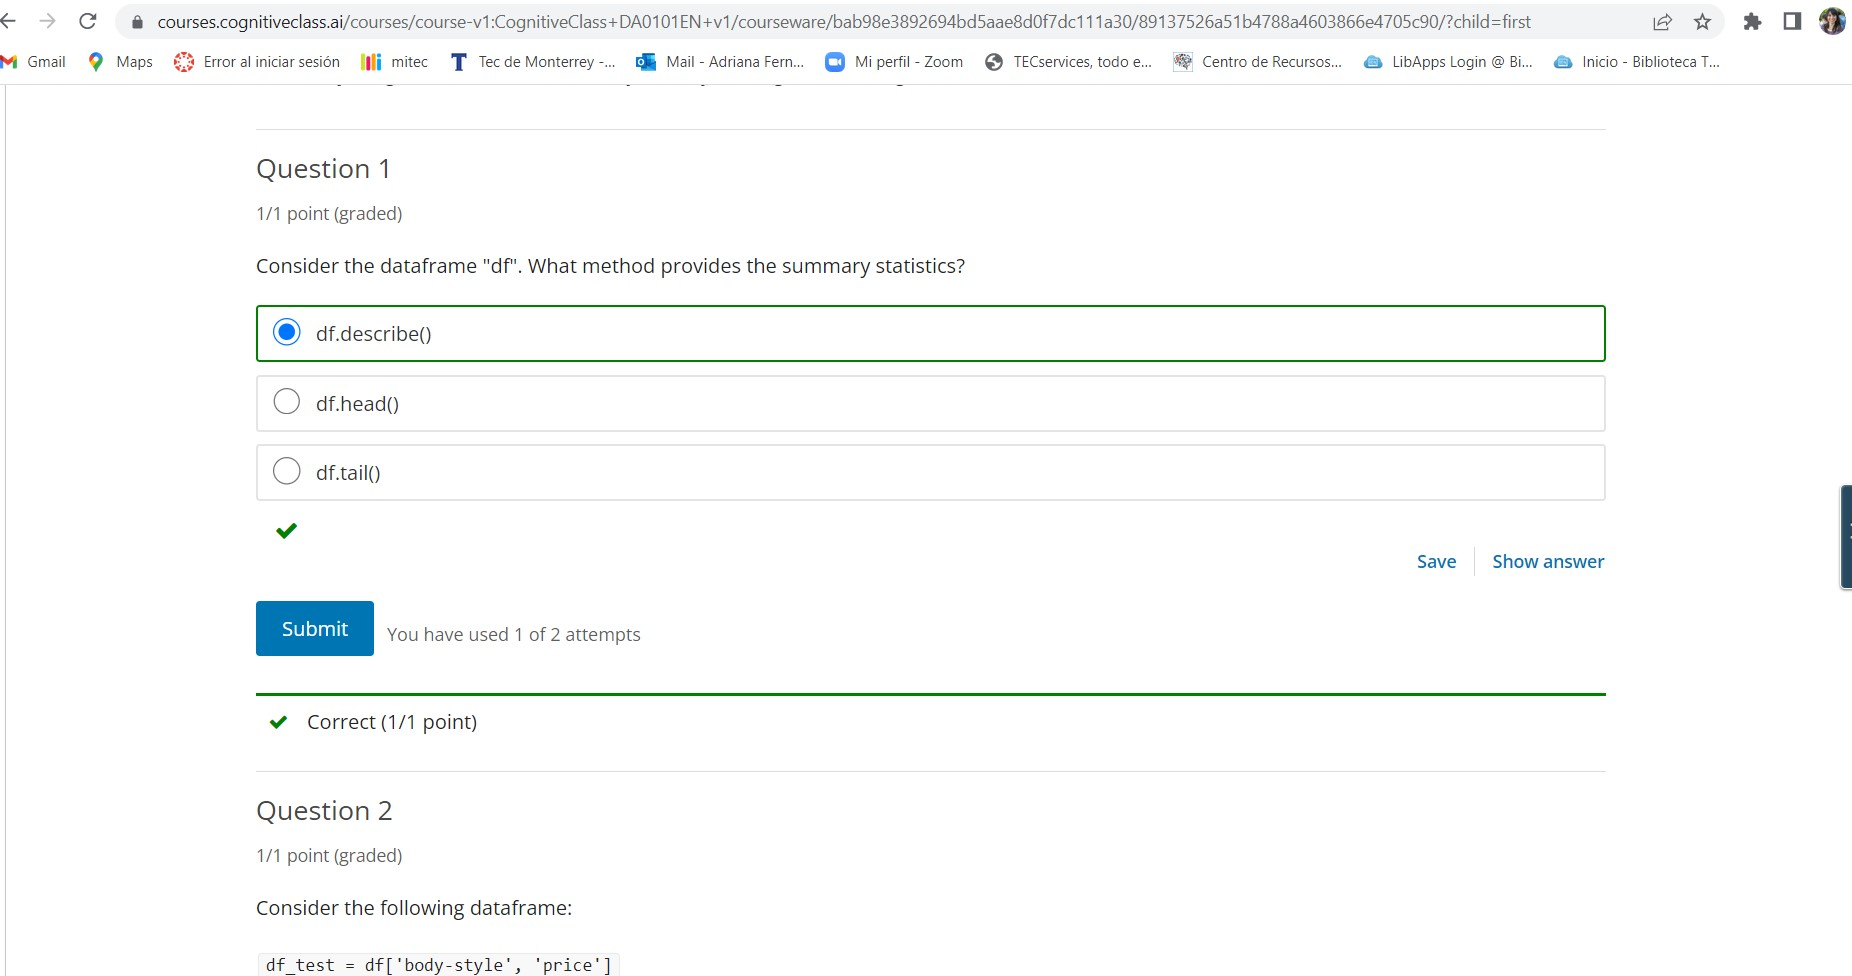